In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv('production-data.csv')
months = [(str(i + 1) + ' month') for i in range(0, 7)] 
#print(months)

In [5]:
sb.set_context("talk", rc={"lines.linewidth": 3})
sb.set_palette("BuPu", 3)

In [6]:
data = df.groupby(['supplier', 'production.date'])
#data.head(n=3)

In [7]:
produced_sum = data['produced'].sum()
#produced_sum.head(n=12)

In [8]:
p = pd.DataFrame(data=np.array([produced_sum['harpy.co'], produced_sum['westeros.inc']])).transpose()
p.columns = ['harpy.co produced', 'westeros.inc produced']
p.index = months[:6]
#p.head(n=10)

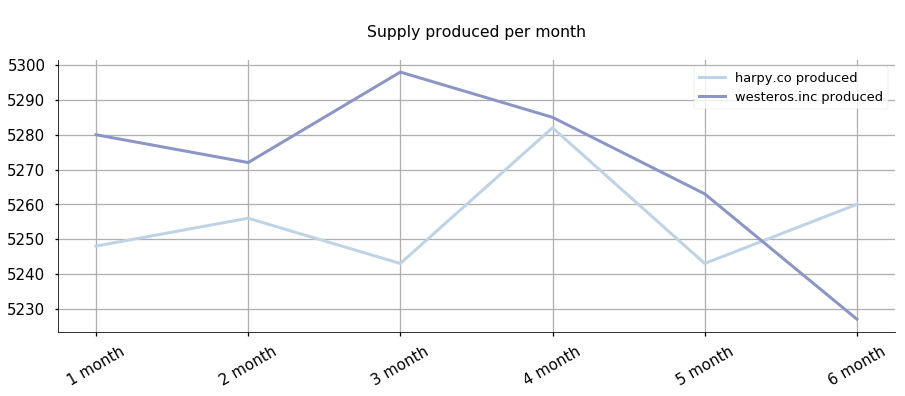

In [9]:
seq = pd.DataFrame({ 'A' : range(0, 6 ,1) })
fig1 = p.plot(figsize=(15,5), title='\nSupply produced per month\n', fontsize=15, linewidth=3, xticks=seq['A'], rot=30)
fig1.grid('on')
sb.despine()

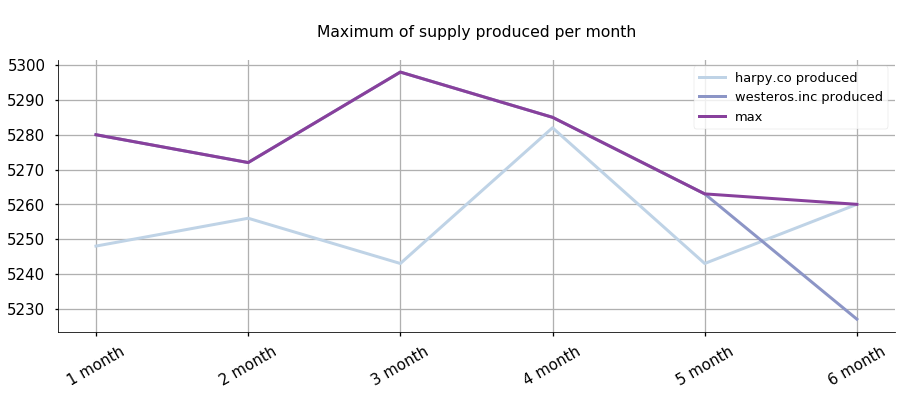

In [10]:
p['max'] = p[['harpy.co produced', 'westeros.inc produced']].max(axis=1)
fig0 = p.plot(figsize=(15,5), title='\nMaximum of supply produced per month\n', fontsize=15, linewidth=3, xticks=seq['A'], rot=30)
fig0.grid('on')
sb.despine()

In [11]:
h_1 = 1 - ((p['max'] - p['harpy.co produced']) / p['max']).sum() / 6
w_1 = 1 - ((p['max'] - p['westeros.inc produced']) / p['max']).sum() / 6
p = p.drop(columns=['max'])

print (h_1, w_1)

0.9960259097234708 0.9989543726235741


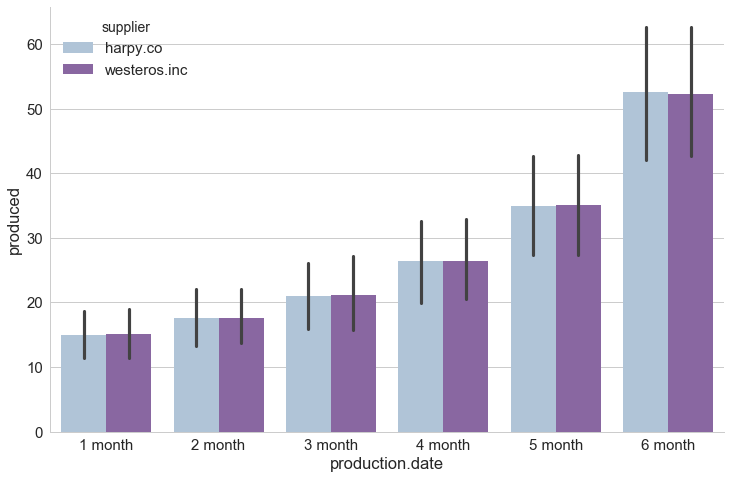

In [12]:
#sb.set_palette("BuPu",2)
sb.set(style="whitegrid", font_scale=1.5)
fig2 = sb.factorplot(x="production.date", y="produced", hue="supplier", data=df, size=7, kind="bar", palette="BuPu", aspect=1.5, legend_out=False)
fig2.set_xticklabels(["1 month", "2 month", "3 month", "4 month", "5 month", "6 month"])
sb.despine()

In [13]:
data = df.groupby(['supplier', 'report.date'])
#data.head(n=10)

In [14]:
defect_sum = data['defects'].sum()
#defect_sum.head(n=15)

In [15]:
d = pd.DataFrame(data=np.array([defect_sum['harpy.co'][1:], defect_sum['westeros.inc'][1:]])).transpose()
d.columns = ['defects of harpy.co', 'defects of westeros.inc']
d.index = months[:6]
#d.head(n=10)

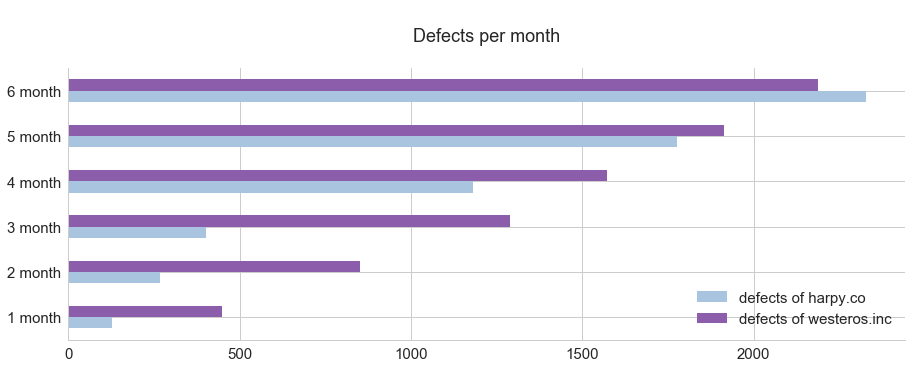

In [16]:
seq = pd.DataFrame({ 'A' : range(0, 6 ,1) })
sb.set_palette("BuPu", 2)
fig2 = d.plot(figsize=(15,5), kind='barh', stacked=False, title='\nDefects per month\n', yticks=seq['A'])
plt.grid('on')
sb.despine()

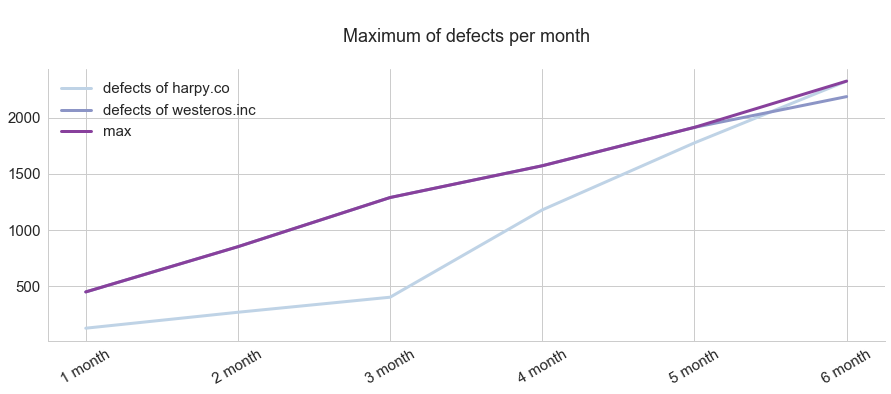

In [17]:
d['max'] = d[['defects of harpy.co', 'defects of westeros.inc']].max(axis=1)
sb.set_palette("BuPu", 3)
fig0 = d.plot(figsize=(15,5), title='\nMaximum of defects per month\n', fontsize=15, linewidth=3, xticks=seq['A'], rot=30)
fig0.grid('on')
sb.despine()

In [18]:
h_2 = 1 - ((d['max'] - d['defects of harpy.co']) / d['max']).sum() / 6
w_2 = 1 - ((d['max'] - d['defects of westeros.inc']) / d['max']).sum() / 6

print (h_2, w_2)

0.5974836290661043 0.9901160292221745


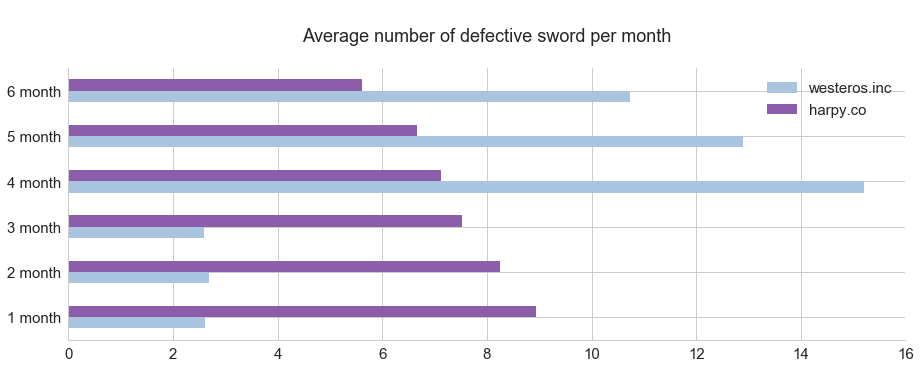

In [19]:
# сколько в среднем ломается оружия за день
sb.set_palette("BuPu", 2)
pdata = pd.DataFrame(data=df)
pdata['new'] = pdata['report.date'] - pdata['production.date']
gb = pdata.groupby(['supplier', 'new'])['defects'].mean()
harp_co = np.array(gb['harpy.co'][1:])
west_inc = np.array(gb['westeros.inc'][1:])
tmp = pd.DataFrame(columns={'harpy.co', 'westeros.inc'}, data=(np.array([harp_co, west_inc])).transpose())
ax = tmp.plot(figsize=(15,5), kind='barh', stacked=False, title='\nAverage number of defective sword per month\n')
ax.set_yticklabels(months)
ax.set_xlim([0, 16])
ax.grid('on')
sb.despine()

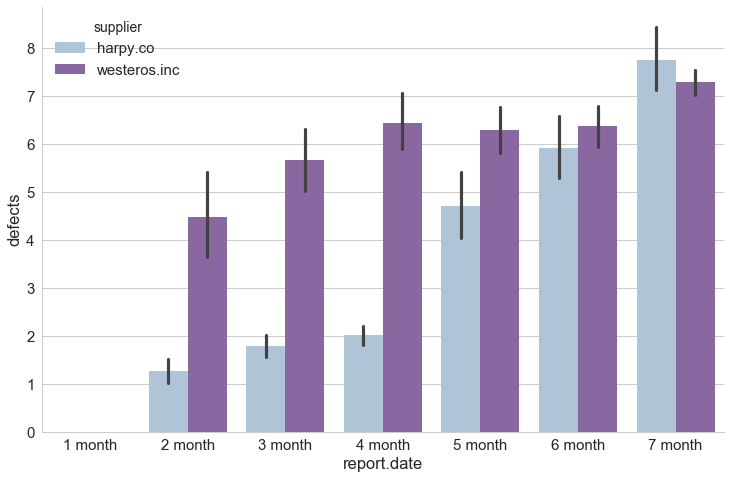

In [20]:
sb.set(style="whitegrid", font_scale=1.5)
fig3 = sb.factorplot(x="report.date", y="defects", hue="supplier", data=df, size=7, kind="bar", palette="BuPu", aspect=1.5, legend_out=False)
fig3.set_xticklabels(["1 month", "2 month", "3 month", "4 month", "5 month", "6 month", "7 month"])

In [21]:
relate = pd.DataFrame(columns=['harpy.co', 'westeros.inc'], index = p.index)
relate['harpy.co'] = d['defects of harpy.co'] / p['harpy.co produced']
relate['westeros.inc'] = d['defects of westeros.inc'] / p['westeros.inc produced']
#print(relate.head(n=7))

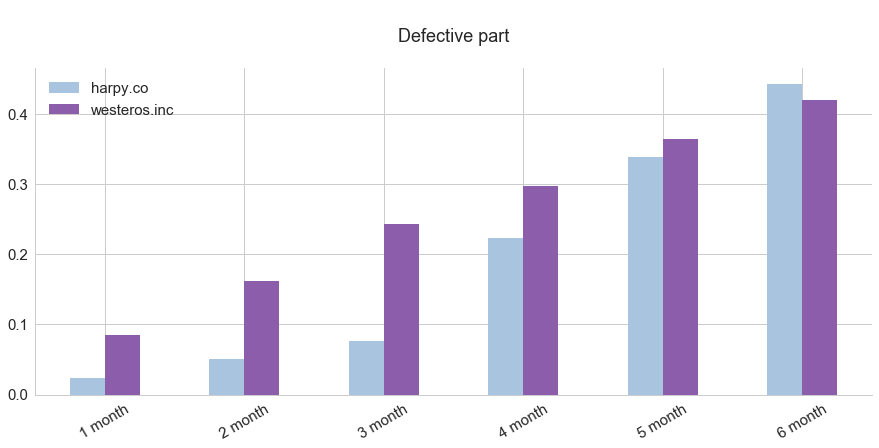

In [22]:
sb.set_palette("BuPu", 2)
fig3 = relate.plot.bar(figsize=(15, 6), title='\nDefective part\n', rot=30)
plt.grid('on')
sb.despine()

In [23]:
h_res = 0.9 * (h_1 - h_2)
w_res = w_1 - w_2
if (h_res > w_res):
    print ('\"Harpy & Co" is the best choice.')
else:
     print ('\"Westeros Inc" is the best choice.')
print (h_res, w_res)

"Harpy & Co" is the best choice.
0.3586880525916299 0.008838343401399662
